In [ ]:
!pip install pydub==0.25.1 nnAudio==0.3.2 torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 yolov5==7.0.9

In [2]:
!git clone https://github.com/RedbirdTaiwan/silic

Cloning into 'silic'...
remote: Enumerating objects: 409, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 409 (delta 16), reused 18 (delta 7), pack-reused 376
Receiving objects: 100% (409/409), 276.44 MiB | 28.15 MiB/s, done.
Resolving deltas: 100% (202/202), done.
Updating files: 100% (25/25), done.


In [3]:
%cd 'silic'
!git pull
import pandas as pd, silic
from IPython.display import Image
from google.colab import files

/content/silic
Already up to date.


/usr/local/lib/python3.8/dist-packages/nnAudio/Spectrogram.py:4: Warning: importing Spectrogram subpackage will be deprecated soon. You should import the feature extractor from the feature subpackage. See actual documentation.
  warnings.warn(


In [4]:
model = silic.Silic()
model.audio('sample/49593.mp3')

STFT kernels created, time used = 0.1964 seconds
STFT kernels created, time used = 0.0805 seconds
STFT filter created, time used = 0.0050 seconds
Mel filter created, time used = 0.0051 seconds
Origional audio: channel = 1, sample_rate = 32000 Hz, sample_size = 192000, duration = 6.0 s
Standarized audio: channel = 1, sample_rate = 32000 Hz, sample_size = 192000, duration = 6.0 s


Spectrogram was saved to sample/linear/49593.jpg.


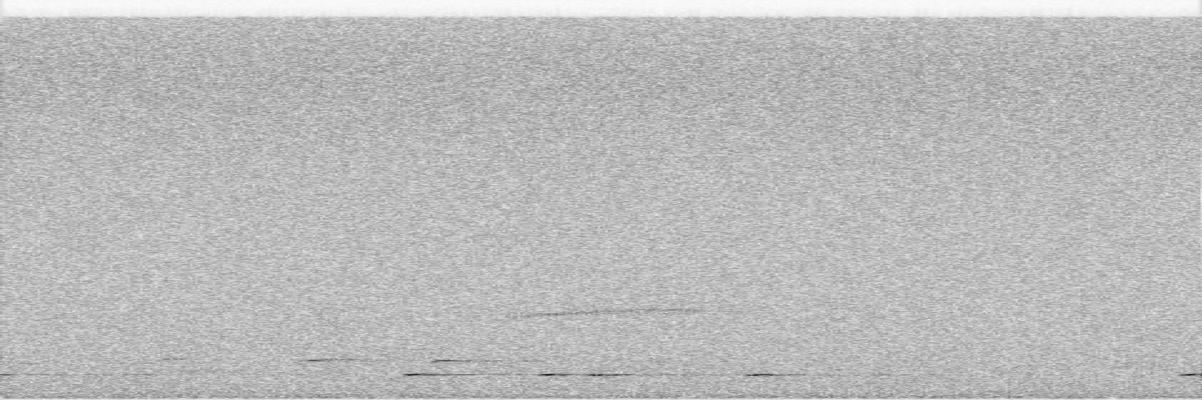

In [5]:
spect_linear = model.tfr()
Image(spect_linear)

Spectrogram was saved to sample/mel/49593.jpg.


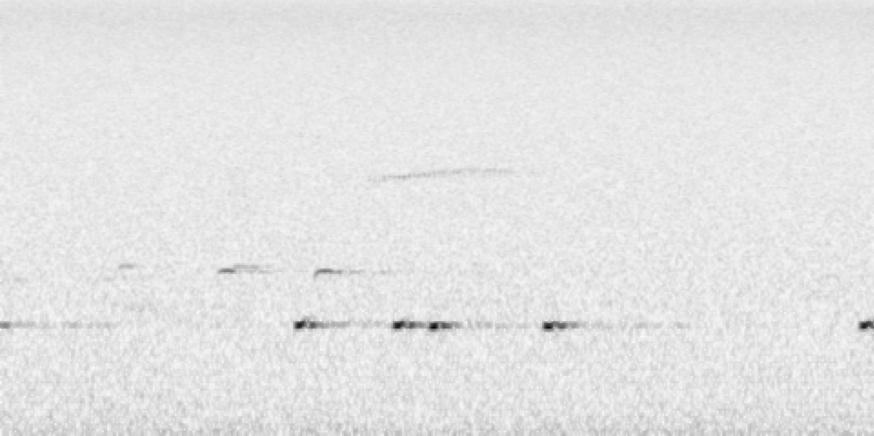

In [7]:
spect_mel = model.tfr(spect_type='mel')
Image(spect_mel)

Spectrogram was saved to sample/rainbow/49593.jpg.


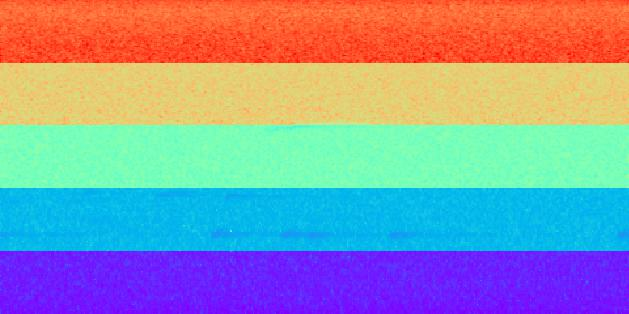

In [8]:
spect_rainbow = model.tfr(spect_type='rainbow')
Image(spect_rainbow)

In [9]:
"""
What is weights?
The weight is the kernel of SILIC and will be update after the SILIC is retrain/reinforcement.
Users can choose any version or use the latest version, i.e. higher number.
Users can find all models released in the folder "model"

What is step?
In SILIC, each detect is applied on a 3s audio.
When a recording is longer than 3s, users can choose a duration for the use of moving window
For example, when using step=1000, multiple 3s-clips will be cut every 1000ms, such as a 6s recording will be split into 4 clips: 0-3s, 1-4s, 2-5s and 3-6s

What is targetclasses?
Users can setup targetclasses to focus on the sounds interest, a smaller targetclasses can speed up computing process. 
Use targetclasses=[] can detect all sound classes in the SILIC.
All the class ID can be found in model/expXX/soundclass.csv

What is conf_thres?
The SILIC will provide confidence score (between 0 and 1) for each detect.
Users can choose a threshold of confidence score (conf_thres) to filter out detects with scores lower than conf_thres.
A biger conf_thres can speed up computing process and increase the precision but decrease the recall.
"""
# labels = model.detect(weights='model/exp20/best.pt', step=1000, targetclasses=[66,101], conf_thres=0.1)
labels = model.detect(weights='model/exp24/best.pt', step=1000, targetclasses=[], conf_thres=0.5)

Fusing layers... 
Model summary: 283 layers, 7945526 parameters, 0 gradients


Spectrogram was saved to sample/rainbow/49593.jpg.


In [10]:
df = pd.DataFrame(labels[1:],columns=labels[0])
df = df.sort_values('time_begin')
print(df)

               file  classid species_name sound_class     scientific_name  \
0  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   
1  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   
2  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   
3  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   

   time_begin  time_end  freq_low  freq_high  score  
0        2016      3000       810       1214  0.770  
1        2032      3981       810       1178  0.634  
2        2076      3892       796       1214  0.560  
3        3000      4013       810       1160  0.671  


In [11]:
# This process is used to merge the labels overlapped
newlabels = silic.clean_multi_boxes(labels)
print(newlabels)

               file  classid species_name sound_class     scientific_name  \
0  sample/49593.mp3       66           鵂鶹        S-01  Glaucidium brodiei   

   time_begin  time_end  freq_low  freq_high  score  
0        2016      4013       796       1214   0.77  


Spectrogram was saved to sample/linear/49593.jpg.
sample/labels/49593.jpg saved


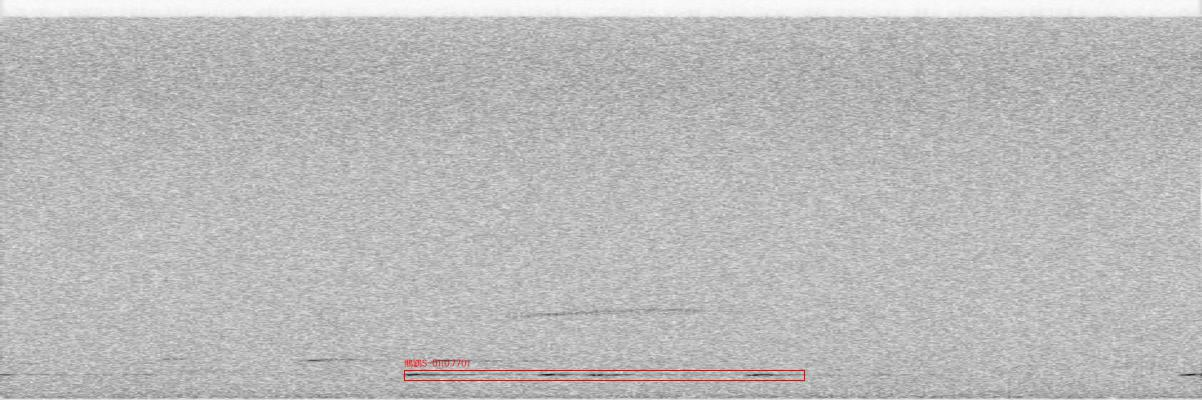

In [13]:
label_img = silic.draw_labels(model, newlabels)
Image(label_img)

In [14]:
# This function can package all the audios, detections and spectrograms of detections for using a www browser to review
silic.browser('/content/silic/sample', weights='model/exp24/best.pt', step=1000, targetclasses=[], conf_thres=0.5)

STFT kernels created, time used = 0.1113 seconds
STFT kernels created, time used = 0.1032 seconds
STFT filter created, time used = 0.0069 seconds
Mel filter created, time used = 0.0070 seconds
9 files found.
Origional audio: channel = 2, sample_rate = 44100 Hz, sample_size = 5291520, duration = 59.99455782312925 s
Standarized audio: channel = 1, sample_rate = 32000 Hz, sample_size = 1919826, duration = 59.9945625 s


Fusing layers... 
Model summary: 283 layers, 7945526 parameters, 0 gradients


Spectrogram was saved to result_silic/linear/TT01_20210401_060000.png.
Spectrogram was saved to result_silic/rainbow/TT01_20210401_060000.png.
94 sounds of 12 species is/are found in /content/silic/sample/TT01_20210401_060000.wav
Origional audio: channel = 2, sample_rate = 44100 Hz, sample_size = 5291520, duration = 59.99455782312925 s
Standarized audio: channel = 1, sample_rate = 32000 Hz, sample_size = 1919826, duration = 59.9945625 s
Spectrogram was saved to result_silic/linear/ZZG01_20210501_070000.png.
Spectrogram was saved to result_silic/rainbow/ZZG01_20210501_070000.png.
55 sounds of 9 species is/are found in /content/silic/sample/ZZG01_20210501_070000.wav
Origional audio: channel = 2, sample_rate = 44100 Hz, sample_size = 1388544, duration = 15.74312925170068 s
Standarized audio: channel = 1, sample_rate = 32000 Hz, sample_size = 503780, duration = 15.743125 s
Spectrogram was saved to result_silic/linear/SILIC-demo.png.
Spectrogram was saved to result_silic/rainbow/SILIC-demo.

In [15]:
files.download('result_silic.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>